# Keyword + 소관부처 영문(Office) 추가된 최종 데이터  'Final_Data.csv' 사용
(학습시키기 전에만)









In [ ]:
! pip install pandas sentence-transformers faiss-cpu

# 유사 법령 찾기
## 유사 조항 20개 중에 top2 법령명 =>  해당하는 법령명 내에서 조항 검색 => 20개 조항 추출

*   use only keyword (소관부처 추가해서 학습시키면 정확도가 떨어지는 거 같아서 keyword만 학습시켰습니다. (Keywords_corpus컬럼))

*   SentenceTransformer('bert-base-nli-mean-tokens')


## 1. 데이터 로드

In [ ]:
import pandas as pd

# df = pd.read_csv('Final_Data_embedding.csv')
df = pd.read_csv('filtered_df.csv')
df

,법령일련번호,Contents,법령명한글,법령명영문,소관부처명,keyword Contents,extract_keywords,Keywords_corpus,cluster
0,253949,(1) The State and local governments shall form...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,the state and local governments shall formula...,"rescue (0.2728), emergency (0.2631), state (0....",emergency government medical rescue state,14
1,253949,"(1) Where any person is in an emergency, he or...",119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,"where any person is in an emergency, he or sh...","emergency (0.4365), rescue (0.3856), rescuer (...",assistance emergency ems rescue rescuer,14
2,253949,Except as otherwise provided for in other stat...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,except as otherwise provided for in other stat...,"emergency (0.2985), rescue (0.2527), medical (...",emergency medical rescue services statutes,-1
3,253949,(1) The Fire Commissioner of the National Fire...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,the fire commissioner of the national fire ag...,"emergency (0.2380), rescue (0.2002), governor ...",administrative agency emergency governor rescue,14
4,253949,Article 7 (Formulation and Implementation of C...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,(formulation and implementation of city/do ion...,"governor (0.2210), special (0.2014), rescue (0...",emergency governor head rescue special,14
...,...,...,...,...,...,...,...,...,...
83445,258803,"Article 10 (Request for Financial Information,...",희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,"(request for financial information, etc. and p...","financial (0.2148), head (0.1356), publicly (0...",agency financial head publicly referred,-1
83446,258803,"(1) ""Requirements prescribed by Presidential D...",희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,"""requirements prescribed by , such as facili...","specialist (0.1835), prescribed (0.1704), depa...",commissioner department prescribed service spe...,-1
83447,258803,"(1) Pursuant to of the Act, the Commissioner o...",희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,"pursuant to of the , the commissioner of the ...","agency (0.2014), institution (0.1900), gazette...",agency entrusted gazette institution organization,-1
83448,258803,(1) The Minister of Health and Welfare shall d...,희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,the minister of health and welfare shall dele...,"disease (0.1251), affairs (0.1243), agency (0....",affairs agency commissioner disease organization,-1


## 1-1. 학습시킨 모델 있으면 모델 불러오기 => 2번 패스

In [ ]:
import joblib

# 모델 불러오기
model, df, index = joblib.load('legal_model_faiss.pkl')

## 2. Sentence Transformers를 사용한 텍스트 임베딩 생성

In [ ]:
from sentence_transformers import SentenceTransformer

# Sentence Transformers 모델 로드
model = SentenceTransformer('bert-base-nli-mean-tokens')

# 'Keywords_corpus' 컬럼의 텍스트 임베딩 생성
embeddings = model.encode(df['Keywords_corpus'].tolist(), batch_size=16, show_progress_bar=True)

# 임베딩을 데이터프레임에 추가
df['embedding'] = embeddings.tolist()

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5216 [00:00<?, ?it/s]

## 3.  Faiss를 사용한 유사도 검색

In [ ]:
import faiss
import numpy as np

# Faiss 인덱스 생성
d = np.array(df['embedding'].tolist())[0].shape[0]  # 벡터 차원
index = faiss.IndexFlatL2(d)  # L2 거리 사용
index.add(np.array(df['embedding'].tolist()))  # 임베딩 추가

def find_most_similar(query, index, df, top_n=20):
    query_embedding = model.encode([query])
    D, I = index.search(query_embedding, top_n)
    top_indices = I[0]
    top_df = df.iloc[top_indices].copy()
    top_df['distance'] = D[0]
    return top_df



## 4. 결과 출력


In [ ]:
# 검색 쿼리와 가장 관련 있는 법령 20개 찾기
query = "I believe I am a victim of a rental scam and need to know the steps to take for protection."
top_20 = find_most_similar(query, index, df, top_n=20)

# 가장 많이 나온 '법령명영문' 2개 추출
top_2_laws = top_20['법령명영문'].value_counts().nlargest(2).index.tolist()

# 추출한 '법령명영문' 2개의 법령에서 관련 있는 법령 20개 추출
filtered_df = df[df['법령명영문'].isin(top_2_laws)]
filtered_embeddings = np.array(filtered_df['embedding'].tolist())
filtered_index = faiss.IndexFlatL2(d)
filtered_index.add(filtered_embeddings)
top_20_filtered = find_most_similar(query, filtered_index, filtered_df, top_n=20)

# 법령 20개와 연관도 수치 출력
for i, row in top_20_filtered.iterrows():
    print(f"법령명한글: {row['법령명한글']}")
    print(f"법령명영문: {row['법령명영문']}")
    print(f"연관도 수치 (Faiss 거리): {row['distance']}")
    print(f"Contents:\n{row['Contents'][:]}")
    print("\n" + "="*80 + "\n")

법령명한글: 대일항쟁기 강제동원 피해조사 및 국외강제동원 희생자 등 지원에 관한 특별법
법령명영문: SPECIAL ACT ON  VERIFICATION AND SUPPORT FOR THE VICTIMS OF FORCED MOBILIZATION UNDER JAPANESE COLONIALISM IN KOREA
연관도 수치 (Faiss 거리): 124.75637817382812
Contents:
(1) No person shall assault or threaten any member or employee of the Commission or an appraiser who is performing his or her duties, force them to conduct any activity in relation to their duties, interrupt their activity conducted in relation to their duties, or assault or threaten them with intent to force them to resign from their position.
  (2) No person shall receive any unfavorable treatment, such as removal from office, suspension from office, salary reduction, or transference, on the ground that the person provided, or intends to provide, information in relation to the investigation of damage from forced mobilization under Japanese colonialism in Korea.
  (3) The Commission shall prepare measures necessary for securing evidence, materials, etc. relating to the

In [ ]:
# 검색 쿼리와 가장 관련 있는 법령 20개 찾기
query = "Natural disaster response plans must be updated annually."
top_20 = find_most_similar(query, index, df, top_n=20)

# 가장 많이 나온 '법령명영문' 2개 추출
top_2_laws = top_20['법령명영문'].value_counts().nlargest(2).index.tolist()

# 추출한 '법령명영문' 2개의 법령에서 관련 있는 법령 20개 추출
filtered_df = df[df['법령명영문'].isin(top_2_laws)]
filtered_embeddings = np.array(filtered_df['embedding'].tolist())
filtered_index = faiss.IndexFlatL2(d)
filtered_index.add(filtered_embeddings)
top_20_filtered = find_most_similar(query, filtered_index, filtered_df, top_n=20)

# 법령 20개와 연관도 수치 출력
for i, row in top_20_filtered.iterrows():
    print(f"법령명한글: {row['법령명한글']}")
    print(f"법령명영문: {row['법령명영문']}")
    print(f"연관도 수치 (Faiss 거리): {row['distance']}")
    print(f"Contents:\n{row['Contents'][:]}")
    print("\n" + "="*80 + "\n")

법령명한글: 자연재해대책법
법령명영문: COUNTERMEASURES AGAINST NATURAL DISASTERS ACT
연관도 수치 (Faiss 거리): 111.93496704101562
Contents:
Article 55-2 (Annual Reports on Natural Disaster Recovery) (1) The Government shall prepare an annual report on natural disasters every year (hereinafter referred to as "annual report") based on the details of reports under Article 55 and submit it to the National Assembly before the regular session of the National Assembly of the following year.
  (2) An annual report shall include the following:
  1. Current status of damage and outline for recovery;
  2. Current status of the progress of recovery of private facilities;
  3. Current status of the progress of recovery of public facilities;
  4. Matters necessary to manage the progress of disaster recovery projects;
  5. Details of execution of budget by each government office and for each project (including the details of actual execution of budget by local governments);
  6. Other matters prescribed by Presidential Decr

## 5. 모델 저장 및 불러오기

In [ ]:
import joblib

# 모델 저장
joblib.dump((model, df, index), 'STbert_model_faiss.pkl')

# 모델 불러오기
model, df, index = joblib.load('STbert_model_faiss.pkl')


In [ ]:
df.to_csv('Final_df_embedding.csv')

In [ ]:
df

,법령일련번호,Contents,법령명한글,법령명영문,소관부처명,keyword Contents,extract_keywords,Keywords_corpus,cluster,embedding
0,253949,(1) The State and local governments shall form...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,the state and local governments shall formula...,"rescue (0.2728), emergency (0.2631), state (0....",emergency government medical rescue state,14,"[0.098821260035038, 0.5147368311882019, 1.8420..."
1,253949,"(1) Where any person is in an emergency, he or...",119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,"where any person is in an emergency, he or sh...","emergency (0.4365), rescue (0.3856), rescuer (...",assistance emergency ems rescue rescuer,14,"[0.19876794517040253, -0.22816741466522217, 2...."
2,253949,Except as otherwise provided for in other stat...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,except as otherwise provided for in other stat...,"emergency (0.2985), rescue (0.2527), medical (...",emergency medical rescue services statutes,-1,"[0.2028171718120575, 0.10762184113264084, 1.86..."
3,253949,(1) The Fire Commissioner of the National Fire...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,the fire commissioner of the national fire ag...,"emergency (0.2380), rescue (0.2002), governor ...",administrative agency emergency governor rescue,14,"[-0.5289183855056763, -0.1933710128068924, 1.9..."
4,253949,Article 7 (Formulation and Implementation of C...,119구조ㆍ구급에 관한 법률,ACT ON 119 RESCUE AND EMERGENCY MEDICAL SERVICES,소방청,(formulation and implementation of city/do ion...,"governor (0.2210), special (0.2014), rescue (0...",emergency governor head rescue special,14,"[-0.44938692450523376, -0.277047336101532, 1.6..."
...,...,...,...,...,...,...,...,...,...,...
83445,258803,"Article 10 (Request for Financial Information,...",희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,"(request for financial information, etc. and p...","financial (0.2148), head (0.1356), publicly (0...",agency financial head publicly referred,-1,"[-0.08324404805898666, 0.43656161427497864, 1...."
83446,258803,"(1) ""Requirements prescribed by Presidential D...",희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,"""requirements prescribed by , such as facili...","specialist (0.1835), prescribed (0.1704), depa...",commissioner department prescribed service spe...,-1,"[0.08297525346279144, -0.30041953921318054, 2...."
83447,258803,"(1) Pursuant to of the Act, the Commissioner o...",희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,"pursuant to of the , the commissioner of the ...","agency (0.2014), institution (0.1900), gazette...",agency entrusted gazette institution organization,-1,"[0.20357152819633484, 0.4905409514904022, 1.17..."
83448,258803,(1) The Minister of Health and Welfare shall d...,희귀질환관리법 시행령,ENFORCEMENT DECREE OF THE RARE DISEASE MANAGEM...,보건복지부 질병관리청,the minister of health and welfare shall dele...,"disease (0.1251), affairs (0.1243), agency (0....",affairs agency commissioner disease organization,-1,"[-0.04131145402789116, -0.18882857263088226, 0..."




---

# testset 한번에 돌리기

##  결과값 n개 조항들에서 '법령명한글' 값만 저장, 중복되면 한개만 남기고 삭제

In [ ]:
import pandas as pd
import joblib
import faiss
import numpy as np

# 데이터 로드
df_testset = pd.read_csv('law_testset_add.csv')  # 'sentence' 컬럼이 있는 CSV 파일 로드


# 모델 및 데이터 불러오기
model, df, index = joblib.load('STbert_model_faiss.pkl')

# Faiss 인덱스 생성
d = np.array(df['embedding'].tolist())[0].shape[0]  # 벡터 차원
index = faiss.IndexFlatL2(d)  # L2 거리 사용
index.add(np.array(df['embedding'].tolist()))  # 임베딩 추가

def find_most_similar(query, index, df, model, top_n=20):
    query_embedding = model.encode([query])
    D, I = index.search(query_embedding, top_n)
    top_indices = I[0]
    top_df = df.iloc[top_indices].copy()
    top_df['distance'] = D[0]
    return top_df

def get_top_2_laws(top_20):
    top_2_laws = top_20['법령명영문'].value_counts().nlargest(2).index.tolist()
    return top_2_laws

def generate_predictions(sentences, index, df, model, d):
    predictions = []
    for sentence in sentences:
        # Step 1: 검색 쿼리와 가장 관련 있는 법령 20개 찾기
        top_20 = find_most_similar(sentence, index, df, model, top_n=20)

        # Step 2: 가장 많이 나온 '법령명영문' 2개 추출
        top_2_laws = get_top_2_laws(top_20)

        # Step 3: 추출한 '법령명영문' 2개의 법령에서 관련 있는 법령 20개 추출
        filtered_df = df[df['법령명영문'].isin(top_2_laws)]
        filtered_embeddings = np.array(filtered_df['embedding'].tolist())
        filtered_index = faiss.IndexFlatL2(d)
        filtered_index.add(filtered_embeddings)
        top_20_filtered = find_most_similar(sentence, filtered_index, filtered_df, model, top_n=20)

        # Step 4: 법령명한글 중복 제거 후 콤마로 연결
        unique_laws_korean = top_20_filtered['법령명한글'].drop_duplicates().tolist()
        predictions.append(", ".join(unique_laws_korean))

    return predictions

# 'sentence' 컬럼의 모든 문장에 대해 예측 수행
df_testset['prediction'] = generate_predictions(df_testset['sentence'].tolist(), index, df, model, d)

# 결과를 CSV 파일로 저장
df_testset.to_csv('STbert_pred_20add.csv', index=False)

print("Predictions saved to 'predicted_output.csv'")


# 평가 지표 : mAP

In [1]:
import pandas as pd

# 데이터 로드
df2 = pd.read_csv('STbert_pred20.csv')  # 'sentence' 컬럼이 있는 CSV 파일 로드


# '시행령' 단어를 label 컬럼에서 삭제
df2['label'] = df2['label'].str.replace('시행령', '')

# 'check' 컬럼 생성
def check_predictions(row):
    gt = row['label'].strip()
    pred = row['prediction']
    return 'O' if gt in pred else 'X'

df2['check'] = df2.apply(check_predictions, axis=1)

# mAP 평가 함수 정의
def calculate_mAP(df):
    """
    mAP(mean Average Precision) 계산
    """
    def average_precision(gt, pred):
        hits = 0
        sum_precisions = 0
        # label 값이 prediction 문자열에 포함되는지 확인
        if gt in pred:
            hits += 1
            sum_precisions += hits / 1  # 첫 번째 매칭이므로 1로 나눔
        if hits == 0:
            return 0
        return sum_precisions / 1  # GT가 단일 값이므로 1로 나눔

    mAP = 0
    for _, row in df.iterrows():
        gt = row['label']
        pred = row['prediction']
        mAP += average_precision(gt, pred)

    return mAP / len(df)

# mAP 계산
mAP = calculate_mAP(df2)

print(f"mAP: {mAP}")

mAP: 0.2150336162239612


In [3]:
# 결과를 CSV 파일로 저장 => 무의미
df2.to_csv('STbert_pred20_mAP.csv', index=False)

# 결과가 너무 안좋다,,,,

# 평가 지표 : f1-score

In [112]:
from sklearn.metrics import f1_score

# CSV 파일 로드
df3 = pd.read_csv('STbert_pred20.csv')

# '시행령' 단어를 Label 컬럼에서 삭제
df3['label'] = df3['label'].str.replace('시행령', '')

# 'check' 컬럼 생성
def check_predictions(row):
    gt = row['label'].strip()
    pred = row['prediction']
    return 'O' if gt in pred else 'X'

df3['check'] = df3.apply(check_predictions, axis=1)

# f1-score 계산
y_true = df3['label'].apply(lambda x: 1 if x != '' else 0)
y_pred = df3['check'].apply(lambda x: 1 if x == 'O' else 0)

f1 = f1_score(y_true, y_pred)
f1

0.38788201847903336

# 카테고리별 평가 지표

# 1. f1-score (카테고리별)

In [126]:
import pandas as pd
from sklearn.metrics import f1_score

# CSV 파일 로드
df_data = pd.read_csv('STbert_pred20_mAP.csv')

# '시행령' 단어를 Label 컬럼에서 삭제
df_data['label'] = df_data['label'].str.replace('시행령', '')

# 카테고리별로 라벨 정의
categories = {
    '생활': ['특허법 시행규칙', '보호소년 등의 처우에 관한 법률 시행령', '소비자생활협동조합법', '통계법', '상표법', '여권법', '보험업법'],
    '보건(의료)': ['구강보건법', '응급의료에 관한 법률', '감염병의 예방 및 관리에 관한 법률', '비파괴검사기술의 진흥 및 관리에 관한 법률 시행령', '보건의료기술 진흥법 시행령', '의료보험법', '국민건강보험법', '의료법', '공중위생관리법'],
    '복지': ['장애아동 복지지원법', '장애인고용촉진 및 직업재활법', '아동수당법', '청소년 기본법'],
    '경제': ['외국인투자 촉진법', '조세특례제한법', '관세법', '지방세법', '자본시장과 금융투자업에 관한 법률', '취업 후 학자금 상환 특별법', '채무자 회생 및 파산에 관한 법률', '상호저축은행법', '정치자금법', '주택도시기금법', '보조금 관리에 관한 법률'],
    '교육': ['한국사학진흥재단법'],
    '환경': ['도시 및 주거환경정비법', '환경오염피해 배상책임 및 구제에 관한 법률', '환경교육의 활성화 및 지원에 관한 법률', '지하수법', '도시개발법', '산지관리법', '자연환경보전법', '도시철도법', '환경정책기본법', '하천법'],
    '정보': ['정보보호법', '공공데이터의 제공 및 이용 활성화에 관한 법률', '디엔에이신원확인정보의 이용 및 보호에 관한 법률', '뉴스통신 진흥에 관한 법률', '개인정보 보호법', '공공기록물 관리에 관한 법률', '방송법'],
    '산업': ['벤처투자 촉진에 관한 법률', '화학물질의 등록 및 평가 등에 관한 법률', '과학기술기본법', '원자력 진흥법', '원자력손해배상 보상계약에 관한 법률', '중소기업기본법', '화학물질관리법', '제조물 책임법', '잠업법'],
    '문화': ['세계유산보존법', '진실ㆍ화해를 위한 과거사정리 기본법', '문학진흥법'],
    '근로': ['임금채권보장법'],
    '중범죄': ['마약법', '형사소송법', '형법'],
    '안전': ['소방법', '해사안전법', '소방장비관리법', '자연재해대책법', '석면피해구제법', '선박소유자 등의 책임제한절차에 관한 법률', '재난 및 안전관리 기본법'],
    '부동산': ['부동산등기법', '국토의 계획 및 이용에 관한 법률', '건축법', '부동산 거래신고 등에 관한 법률', '공동주택관리법', '주택임대차보호법', '부동산 가격공시에 관한 법률', '공인중개사법', '지적법'],
    '국제': ['국제조세조정에관한 법률 시행규칙', '외국인토지법', '외국인근로자의 고용 등에 관한 법률', '외국인관광객 등에 대한 부가가치세 및 개별소비세 특례규정', '외국인의 부동산등기용 등록번호 부여절차', '한국국제교류재단법']
}

# 카테고리 매핑
def map_category(label):
    for category, labels in categories.items():
        if label in labels:
            return category
    return '기타'

df_data['Category'] = df_data['label'].apply(map_category)

# 카테고리별 F1 점수 계산
category_f1_scores = {}

for category in df_data['Category'].unique():
    df_category = df_data[df_data['Category'] == category]
    y_true = df_category['label'].apply(lambda x: 1 if x != '' else 0)
    y_pred = df_category['check'].apply(lambda x: 1 if x == 'O' else 0)
    f1 = f1_score(y_true, y_pred)
    category_f1_scores[category] = f1

category_f1_scores



{'기타': 0.3771043771043771,
 '보건(의료)': 0.5248041775456919,
 '복지': 0.5354330708661417,
 '중범죄': 0.6135265700483091,
 '경제': 0.4482366325369739,
 '생활': 0.4296998420221169,
 '환경': 0.45696400625978095,
 '안전': 0.09855072463768116,
 '정보': 0.5318761384335154,
 '문화': 0.33714285714285713,
 '산업': 0.3125659978880676,
 '국제': 0.10459587955625989,
 '교육': 0.2711864406779661,
 '부동산': 0.21052631578947367,
 '근로': 0.19819819819819817}

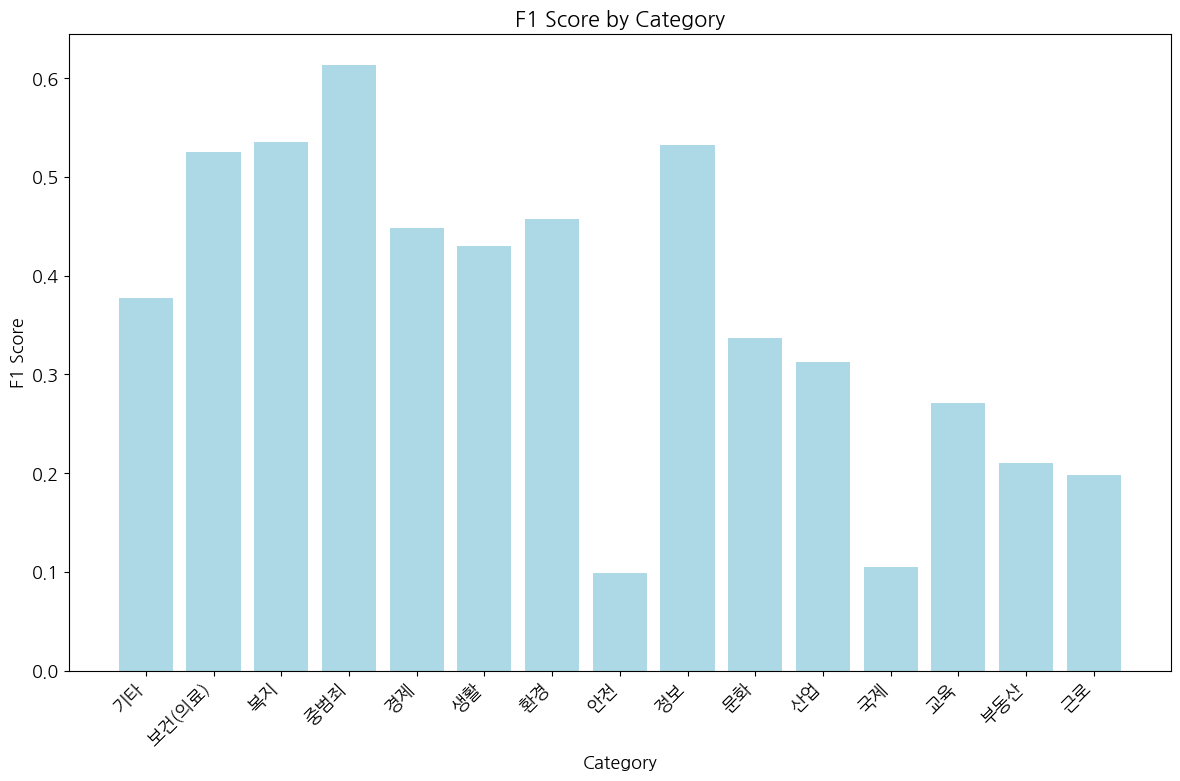

In [127]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

# 한글 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 13, 'font.family': 'NanumGothic'})


# F1 점수를 막대그래프로 시각화
categories = list(category_f1_scores.keys())
f1_scores = list(category_f1_scores.values())


plt.figure(figsize=(12, 8))
plt.bar(categories, f1_scores, color='lightblue')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 저장
output_path = 'category_f1_scores.png'
plt.savefig(output_path)
plt.show()


# 2. mAP (카테고리별)

In [124]:
import pandas as pd

# CSV 파일 로드
df_data = pd.read_csv('STbert_pred20_mAP.csv')

# '시행령' 단어를 Label 컬럼에서 삭제
df_data['label'] = df_data['label'].str.replace('시행령', '')

# 카테고리별로 라벨 정의
categories = {
    '생활': ['특허법 시행규칙', '보호소년 등의 처우에 관한 법률 시행령', '소비자생활협동조합법', '통계법', '상표법', '여권법', '보험업법'],
    '보건(의료)': ['구강보건법', '응급의료에 관한 법률', '감염병의 예방 및 관리에 관한 법률', '비파괴검사기술의 진흥 및 관리에 관한 법률 시행령', '보건의료기술 진흥법 시행령', '의료보험법', '국민건강보험법', '의료법', '공중위생관리법'],
    '복지': ['장애아동 복지지원법', '장애인고용촉진 및 직업재활법', '아동수당법', '청소년 기본법'],
    '경제': ['외국인투자 촉진법', '조세특례제한법', '관세법', '지방세법', '자본시장과 금융투자업에 관한 법률', '취업 후 학자금 상환 특별법', '채무자 회생 및 파산에 관한 법률', '상호저축은행법', '정치자금법', '주택도시기금법', '보조금 관리에 관한 법률'],
    '교육': ['한국사학진흥재단법'],
    '환경': ['도시 및 주거환경정비법', '환경오염피해 배상책임 및 구제에 관한 법률', '환경교육의 활성화 및 지원에 관한 법률', '지하수법', '도시개발법', '산지관리법', '자연환경보전법', '도시철도법', '환경정책기본법', '하천법'],
    '정보': ['정보보호법', '공공데이터의 제공 및 이용 활성화에 관한 법률', '디엔에이신원확인정보의 이용 및 보호에 관한 법률', '뉴스통신 진흥에 관한 법률', '개인정보 보호법', '공공기록물 관리에 관한 법률', '방송법'],
    '산업': ['벤처투자 촉진에 관한 법률', '화학물질의 등록 및 평가 등에 관한 법률', '과학기술기본법', '원자력 진흥법', '원자력손해배상 보상계약에 관한 법률', '중소기업기본법', '화학물질관리법', '제조물 책임법', '잠업법'],
    '문화': ['세계유산보존법', '진실ㆍ화해를 위한 과거사정리 기본법', '문학진흥법'],
    '근로': ['임금채권보장법'],
    '중범죄': ['마약법', '형사소송법', '형법'],
    '안전': ['소방법', '해사안전법', '소방장비관리법', '자연재해대책법', '석면피해구제법', '선박소유자 등의 책임제한절차에 관한 법률', '재난 및 안전관리 기본법'],
    '부동산': ['부동산등기법', '국토의 계획 및 이용에 관한 법률', '건축법', '부동산 거래신고 등에 관한 법률', '공동주택관리법', '주택임대차보호법', '부동산 가격공시에 관한 법률', '공인중개사법', '지적법'],
    '국제': ['국제조세조정에관한 법률 시행규칙', '외국인토지법', '외국인근로자의 고용 등에 관한 법률', '외국인관광객 등에 대한 부가가치세 및 개별소비세 특례규정', '외국인의 부동산등기용 등록번호 부여절차', '한국국제교류재단법']
}

# 카테고리 매핑
def map_category(label):
    for category, labels in categories.items():
        if label in labels:
            return category
    return '기타'

df_data['Category'] = df_data['label'].apply(map_category)

# mAP 평가 함수 정의
def calculate_mAP(df):
    """
    mAP(mean Average Precision) 계산
    """
    def average_precision(gt, pred):
        hits = 0
        sum_precisions = 0
        # label 값이 prediction 문자열에 포함되는지 확인
        if gt in pred:
            hits += 1
            sum_precisions += hits / 1  # 첫 번째 매칭이므로 1로 나눔
        if hits == 0:
            return 0
        return sum_precisions / 1  # GT가 단일 값이므로 1로 나눔

    mAP = 0
    for _, row in df.iterrows():
        gt = row['label']
        pred = row['prediction']
        mAP += average_precision(gt, pred)

    return mAP / len(df)

# 카테고리별 mAP 계산
category_map_scores = {}

for category in df_data['Category'].unique():
    df_category = df_data[df_data['Category'] == category]
    mAP = calculate_mAP(df_category)
    category_map_scores[category] = mAP

category_map_scores


{'기타': 0.1681881051175657,
 '보건(의료)': 0.35575221238938054,
 '복지': 0.3655913978494624,
 '중범죄': 0.4425087108013937,
 '경제': 0.28885630498533726,
 '생활': 0.27364185110663986,
 '환경': 0.2961460446247465,
 '안전': 0.051829268292682924,
 '정보': 0.36228287841191065,
 '문화': 0.2027491408934708,
 '산업': 0.18523153942428036,
 '국제': 0.05518394648829431,
 '교육': 0.1568627450980392,
 '부동산': 0.11764705882352941,
 '근로': 0.11}

# mAP (카테고리별) - 시각화

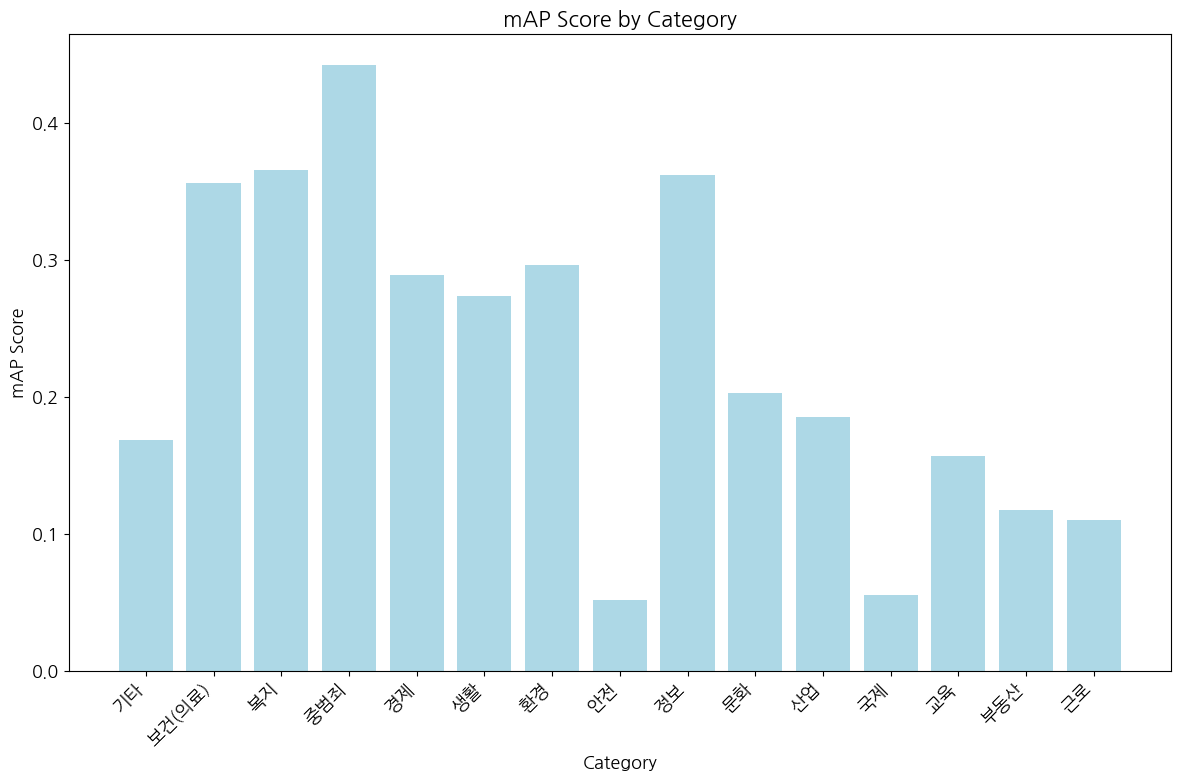

In [125]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 13, 'font.family': 'NanumGothic'}) # 폰트 설정

# 카테고리와 mAP 점수를 리스트로 변환
categories = list(category_map_scores.keys())
map_scores = list(category_map_scores.values())

plt.figure(figsize=(12, 8))

# 막대그래프 생성
plt.bar(categories, map_scores, color='lightblue')

plt.xlabel('Category')
plt.ylabel('mAP Score')
plt.title('mAP Score by Category')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

# 생활주제로 label 확장

## 1. label 변경 => living label

In [60]:
stbert_pred20_map_df = pd.read_csv('STbert_pred20_mAP.csv')
subject_group_df = pd.read_csv('주제별묶음.csv')


subject_group_df.rename(columns={'Unnamed: 0': 'law'}, inplace=True)

# 기존 'label' 컬럼에서 의미 확장한 'living label'
def find_living_labels_no_duplicates(label):
    matching_laws = subject_group_df[subject_group_df['law'].str.contains(label, na=False)]
    living_labels = matching_laws.iloc[:, 1:].apply(lambda x: x[x == 1].index.tolist(), axis=1)
    living_labels = living_labels.apply(lambda x: ','.join(x) if x else '')
    all_labels = [label for sublist in living_labels.tolist() for label in sublist.split(',')]
    unique_labels = sorted(set(all_labels), key=all_labels.index)

    return ','.join(unique_labels)

# 기존 'label' 컬럼에서 의미 확장한 'living label'
stbert_pred20_map_df['living label'] = stbert_pred20_map_df['label'].apply(find_living_labels_no_duplicates)


stbert_pred20_map_df.head()


,sentence,label,prediction,check,living label
0,Natural disaster response plans must be update...,자연재해대책법,"자연재해대책법, 행정규제기본법",O,미포함
1,Evacuation procedures should be clearly outlin...,자연재해대책법,"재난 및 안전관리 기본법 시행령, 재난관리자원의 관리 등에 관한 법률",X,미포함
2,Compensation for natural disaster damages is g...,자연재해대책법,"예비군법 시행령, 농어업재해보험법",X,미포함
3,The government provides funding for disaster r...,자연재해대책법,"지방재정법 시행령, 재해구호법",X,미포함
4,Public awareness campaigns on disaster prepare...,자연재해대책법,"자연재해대책법, 재난 및 안전관리 기본법 시행령",O,미포함


In [58]:
! pip install ace_tools

In [63]:

stbert_pred20_map_df.to_csv('Updated_STbert_pred20_mAP.csv', index=False)

## 2. prediction 변경 => living prediction

In [64]:
stbert_pred20_map_df = pd.read_csv('Updated_STbert_pred20_mAP.csv')
subject_group_df = pd.read_csv('주제별묶음.csv')

# subject_group_df의 첫 번째 컬럼 이름을 더 쉽게 접근할 수 있도록
subject_group_df.rename(columns={'Unnamed: 0': 'law'}, inplace=True)

# 기존 'label' 컬럼에서 의미 확장한 'living_predictions'
def find_living_predictions_no_duplicates(predictions):
    all_labels = []
    for prediction in predictions.split(','):
        matching_laws = subject_group_df[subject_group_df['law'].str.contains(prediction.strip(), na=False)]
        living_labels = matching_laws.iloc[:, 1:].apply(lambda x: x[x == 1].index.tolist(), axis=1)
        living_labels = living_labels.apply(lambda x: ','.join(x) if x else '')
        all_labels.extend([label for sublist in living_labels.tolist() for label in sublist.split(',')])
    unique_labels = sorted(set(all_labels), key=all_labels.index)
    return ','.join(unique_labels)

# 기존 'label' 컬럼에서 의미 확장한 'living_predictions'
stbert_pred20_map_df['living prediction'] = stbert_pred20_map_df['prediction'].apply(find_living_predictions_no_duplicates)


stbert_pred20_map_df.head()


<ipython-input-64-d1447f3b072c>:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_laws = subject_group_df[subject_group_df['law'].str.contains(prediction.strip(), na=False)]
<ipython-input-64-d1447f3b072c>:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_laws = subject_group_df[subject_group_df['law'].str.contains(prediction.strip(), na=False)]
<ipython-input-64-d1447f3b072c>:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_laws = subject_group_df[subject_group_df['law'].str.contains(prediction.strip(), na=False)]
<ipython-input-64-d1447f3b072c>:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_laws

,sentence,label,prediction,check,living label,living prediction
0,Natural disaster response plans must be update...,자연재해대책법,"자연재해대책법, 행정규제기본법",O,미포함,"복지,환경/에너지,미포함"
1,Evacuation procedures should be clearly outlin...,자연재해대책법,"재난 및 안전관리 기본법 시행령, 재난관리자원의 관리 등에 관한 법률",X,미포함,미포함
2,Compensation for natural disaster damages is g...,자연재해대책법,"예비군법 시행령, 농어업재해보험법",X,미포함,"미포함,"
3,The government provides funding for disaster r...,자연재해대책법,"지방재정법 시행령, 재해구호법",X,미포함,"미포함,가정법률,복지,부동산/임대차"
4,Public awareness campaigns on disaster prepare...,자연재해대책법,"자연재해대책법, 재난 및 안전관리 기본법 시행령",O,미포함,"복지,환경/에너지,미포함"


In [65]:
# 업데이트된 데이터프레임 저장
stbert_pred20_map_df.to_csv('Updated2_STbert_pred20_mAP.csv', index=False)

# living label & living prediction 비교

In [92]:
updated_stbert_pred20_map_df = pd.read_csv('FFinal.csv')

def check_inclusion(row):
    living_labels = set(str(row['living label']).split(','))
    living_predictions = set(str(row['living prediction']).split(','))

    # 단어 한 개라도 포함되어 있는지 확인
    if any(pred in living_labels for pred in living_predictions):
        return 'O'
    else:
        return 'X'

def check_full_inclusion(row):

    living_labels = set(map(str.strip, str(row['living label']).split(',')))
    living_predictions = set(map(str.strip, str(row['living prediction']).split(',')))


    if living_labels == living_predictions:
        return 'O'
    else:
        return 'X'

updated_stbert_pred20_map_df['check2'] = updated_stbert_pred20_map_df.apply(check_inclusion, axis=1)
updated_stbert_pred20_map_df['check3'] = updated_stbert_pred20_map_df.apply(check_full_inclusion, axis=1)


updated_stbert_pred20_map_df.head()


,sentence,label,prediction,check,living label,living prediction,check2,check3
0,Natural disaster response plans must be update...,자연재해대책법,"자연재해대책법, 행정규제기본법",O,미포함,"복지,환경/에너지,미포함",O,X
1,Evacuation procedures should be clearly outlin...,자연재해대책법,"재난 및 안전관리 기본법 시행령, 재난관리자원의 관리 등에 관한 법률",X,미포함,미포함,O,O
2,Compensation for natural disaster damages is g...,자연재해대책법,"예비군법 시행령, 농어업재해보험법",X,미포함,"미포함,",O,X
3,The government provides funding for disaster r...,자연재해대책법,"지방재정법 시행령, 재해구호법",X,미포함,"미포함,가정법률,복지,부동산/임대차",O,X
4,Public awareness campaigns on disaster prepare...,자연재해대책법,"자연재해대책법, 재난 및 안전관리 기본법 시행령",O,미포함,"복지,환경/에너지,미포함",O,X


In [93]:
updated_stbert_pred20_map_df.to_csv('FFFinal.csv', index=False)

# 평가 지표 : mPA - 하나라도 포함

In [94]:
import pandas as pd


df = pd.read_csv('FFFinal.csv')


# mPA
total_correct = len(df[df['check2'] == 'O'])
total_count = len(df)
overall_mPA = total_correct / total_count if total_count > 0 else 0

print(f"Overall mPA: {overall_mPA}")

Overall mPA: 0.9279179984569602


# 평가 지표 : F1-score - 하나라도 포함

In [95]:
import pandas as pd
from sklearn.metrics import f1_score


df = pd.read_csv('FFFinal.csv')

# 'check2' 가지고 판별
df['actual'] = 1  # Assuming all are true labels
df['predicted'] = df['check2'].apply(lambda x: 1 if x == 'O' else 0)

#  F1 score
f1 = f1_score(df['actual'], df['predicted'])

print(f"Overall F1 Score: {f1}")

Overall F1 Score: 0.9626114795335011


# 카테고리 별 mPA - 하나라도 포함

In [122]:
import pandas as pd


df = pd.read_csv('FFFinal.csv')


df['living label'] = df['living label'].str.split(',')
df_exploded = df.explode('living label')


df_exploded = df_exploded[df_exploded['living label'] != '']


labels = df_exploded['living label'].unique()
mPA_results = []

for label in labels:
    label_df = df_exploded[df_exploded['living label'] == label]
    total_count = len(label_df)
    correct_count = len(label_df[label_df['check2'] == 'O'])
    mPA = correct_count / total_count if total_count > 0 else 0
    mPA_results.append({'라벨': label, 'mPA': mPA})

mPA_df = pd.DataFrame(mPA_results)
print(mPA_df)

           라벨       mPA
0         미포함  0.964857
1       교통/운전  0.938499
2          복지  0.970609
3     사회안전/범죄  0.932866
4   아동·청소년/교육  0.929850
5        가정법률  0.946188
6     부동산/임대차  0.951632
7      환경/에너지  0.970370
8       국방/보훈  0.882353
9    국가 및 지자체  0.942577
10      금융/금전  0.937672
11    문화/여가생활  0.965854
12     민·형사소송  0.942833
13    정보통신/기술  0.969444
14     무역/출입국  0.864692
15      근로/노동  0.978537
16        소비자  0.905063


# 카테고리 별 mPA - 하나라도 포함 : 시각화

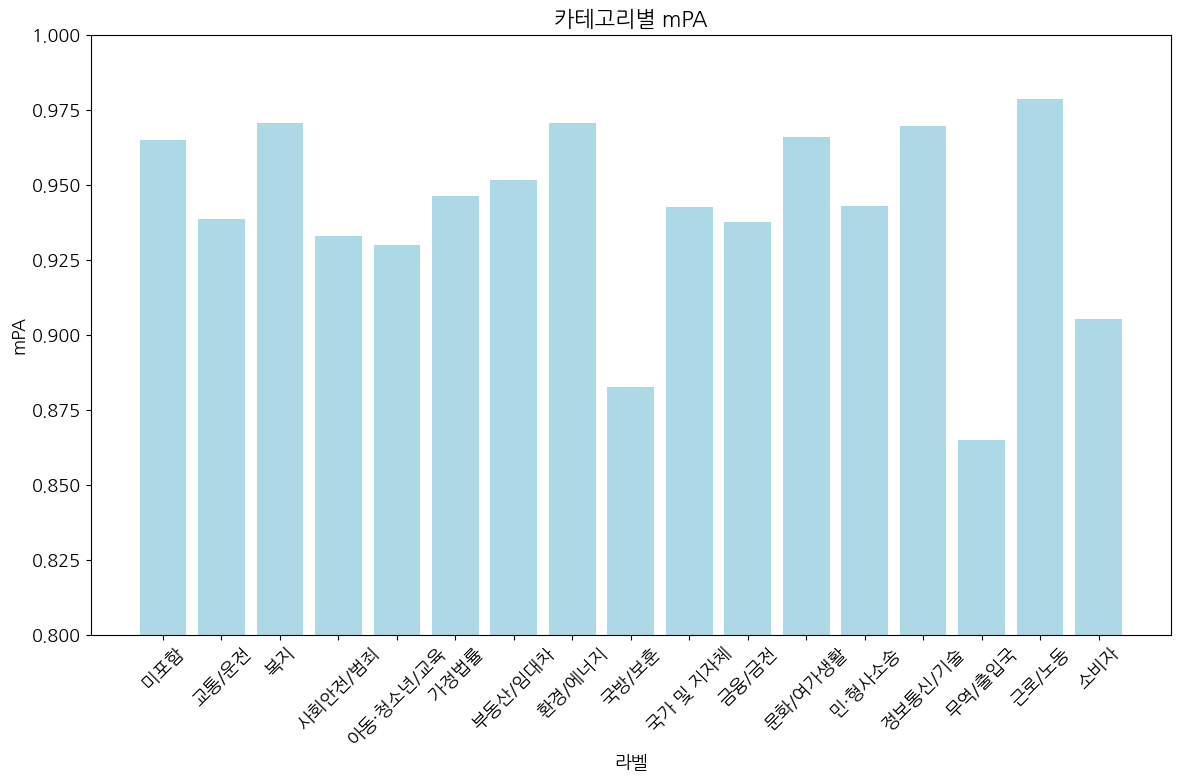

In [123]:
# Plot the results as a bar graph
plt.figure(figsize=(12, 8))
plt.bar(mPA_df['라벨'], mPA_df['mPA'], color='lightblue')
plt.xlabel('라벨')
plt.ylabel('mPA')
plt.title('카테고리별 mPA')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 평가 지표 : mPA - 모두 일치

In [99]:
import pandas as pd
from sklearn.metrics import f1_score


df = pd.read_csv('FFFinal.csv')

# 'check3' 가지고 판별
df['actual'] = 1  # Assuming all are true labels
df['predicted'] = df['check3'].apply(lambda x: 1 if x == 'O' else 0)

#  F1 score
f1 = f1_score(df['actual'], df['predicted'])

print(f"Overall F1 Score: {f1}")

Overall F1 Score: 0.3808334076916213


# 평가 지표 : F1-score - 모두 일치

In [98]:
import pandas as pd
from sklearn.metrics import f1_score


df = pd.read_csv('FFFinal.csv')

# 'check3' 가지고 판별
df['actual'] = 1  # Assuming all are true labels
df['predicted'] = df['check3'].apply(lambda x: 1 if x == 'O' else 0)

#  F1 score
f1 = f1_score(df['actual'], df['predicted'])

print(f"Overall F1 Score: {f1}")

Overall F1 Score: 0.3808334076916213


# 카테고리 별 mPA - 모두 일치

In [114]:
import pandas as pd


df = pd.read_csv('FFFinal.csv')


df['living label'] = df['living label'].str.split(',')
df_exploded = df.explode('living label')


df_exploded = df_exploded[df_exploded['living label'] != '']


labels = df_exploded['living label'].unique()
mPA_results = []

for label in labels:
    label_df = df_exploded[df_exploded['living label'] == label]
    total_count = len(label_df)
    correct_count = len(label_df[label_df['check3'] == 'O'])
    mPA = correct_count / total_count if total_count > 0 else 0
    mPA_results.append({'라벨': label, 'mPA': mPA})


mPA_df = pd.DataFrame(mPA_results)
print(mPA_df)

           라벨       mPA
0         미포함  0.269686
1       교통/운전  0.141451
2          복지  0.174194
3     사회안전/범죄  0.175351
4   아동·청소년/교육  0.194703
5        가정법률  0.105830
6     부동산/임대차  0.096735
7      환경/에너지  0.148148
8       국방/보훈  0.037433
9    국가 및 지자체  0.074230
10      금융/금전  0.096242
11    문화/여가생활  0.137561
12     민·형사소송  0.097763
13    정보통신/기술  0.159722
14     무역/출입국  0.080865
15      근로/노동  0.107317
16        소비자  0.150316


# 카테고리 별 mPA - 모두 일치 : 시각화

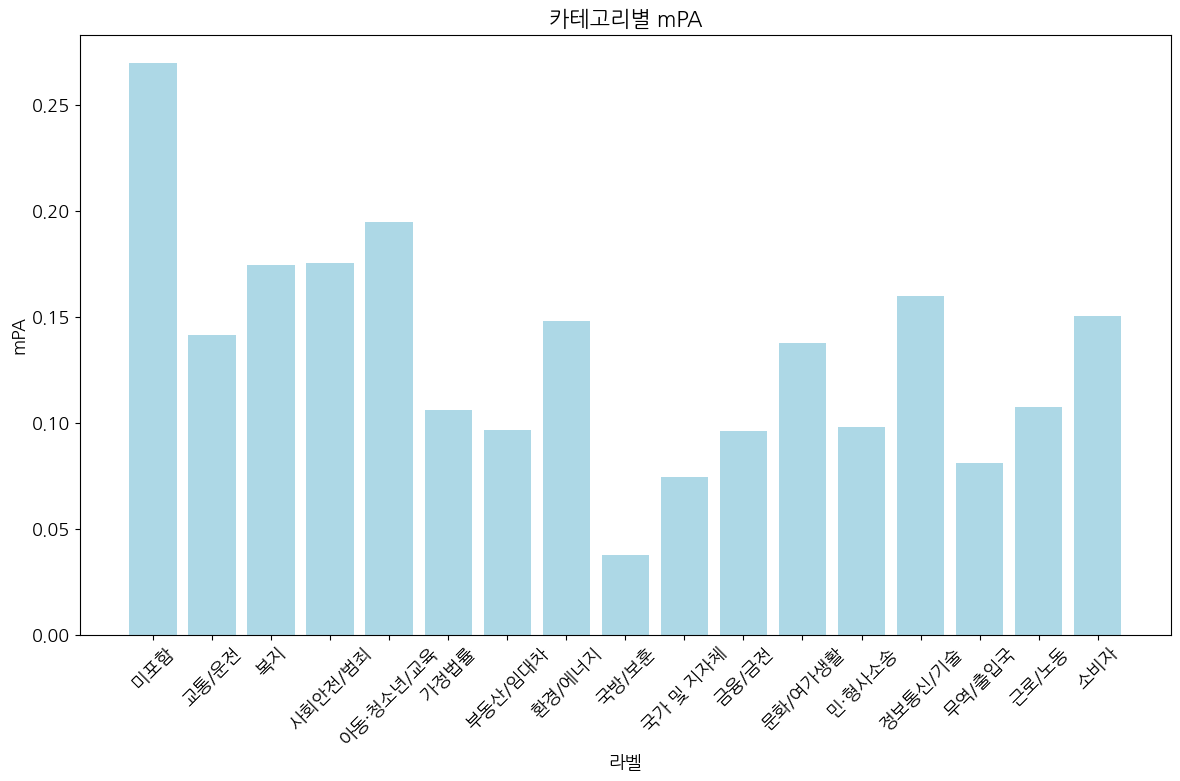

In [120]:
# Plot the results as a bar graph
plt.figure(figsize=(12, 8))
plt.bar(mPA_df['라벨'], mPA_df['mPA'], color='lightblue')
plt.xlabel('라벨')
plt.ylabel('mPA')
plt.title('카테고리별 mPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()